# 1. Sequential

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.build(input_shape=(None, 3))

In [5]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-1.19219482e-01,  1.51557356e-01, -2.62126744e-01,
         -1.84459999e-01, -1.98381528e-01,  2.17429996e-01,
          6.65263534e-02,  8.90417993e-02, -2.53296226e-01,
         -2.95251280e-01,  2.93059468e-01, -6.20846003e-02,
          4.90050614e-02, -1.30125433e-01,  1.00961328e-01,
         -1.53458476e-01, -1.97716922e-01,  5.26626110e-02,
         -1.19690880e-01, -3.60578597e-02,  2.36293137e-01,
         -1.05087698e-01,  4.99983430e-02, -2.07381785e-01,
         -2.63623893e-02, -2.61260301e-01, -1.98520154e-01,
          2.91050911e-01, -2.66410083e-01,  1.63238645e-02,
          1.08954102e-01,  1.55871660e-01,  9.39447284e-02,
          1.36580825e-01, -1.73541784e-01,  1.46152794e-01,
          2.51610041e-01, -7.79693276e-02, -1.33035630e-01,
          5.66517711e-02, -2.85770923e-01,  5.52857816e-02,
          1.47787780e-01,  2.72791445e-01, -6.09450489e-02,
          1.43272877e-02,  2.28

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

# Function API

In [9]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)

model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
inputs.shape

TensorShape([None, 3])

In [11]:
inputs.dtype

tf.float32

In [12]:
features.shape

TensorShape([None, 64])

In [13]:
features.dtype

tf.float32

## Multi Input & Output

In [14]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

In [21]:
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
departments = layers.Dense(num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags],
                   outputs=[priority, departments])

In [22]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0,2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='rmsprop',
             loss=["mean_squared_error", "categorical_crossentropy"],
             metrics=[["mean_squared_error"], ["accuracy"]])

model.fit([title_data, text_body_data, tags_data],
         [priority_data, department_data],
         epochs=1)

model.evaluate([title_data, text_body_data, tags_data],
         [priority_data, department_data])

priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 4ms/step - loss: 40.1710 - priority_loss: 0.3357 - department_loss: 39.8353 - priority_mean_squared_error: 0.3357 - department_accuracy: 0.1187


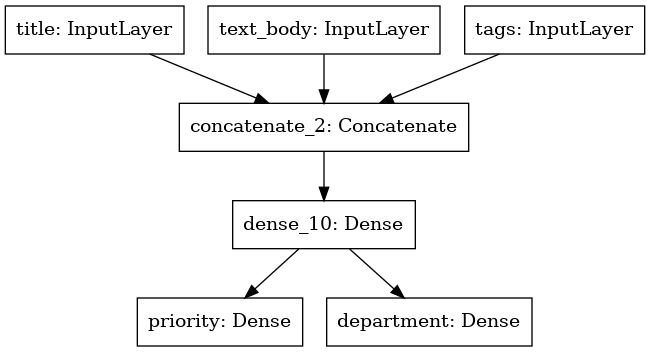

In [23]:
keras.utils.plot_model(model, "ticket_classifier.png")

# Subclassing

In [24]:
class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation="softmax")
        
    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department
    
model = CustomerTicketModel(num_departments=4)

In [25]:
model.compile(optimizer='rmsprop',
             loss=["mean_squared_error", "categorical_crossentropy"],
             metrics=[["mean_squared_error"], ["accuracy"]])

model.fit({"title":title_data, "text_body": text_body_data, "tags": tags_data},
         [priority_data, department_data],
         epochs=1)

model.evaluate({"title":title_data, "text_body": text_body_data, "tags": tags_data},
         [priority_data, department_data])

priority_preds, department_preds = model.predict({"title":title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 4ms/step - loss: 22.7827 - output_1_loss: 0.3357 - output_2_loss: 22.4470 - output_1_mean_squared_error: 0.3357 - output_2_accuracy: 0.5797
